<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels=[]
train_samples=[]

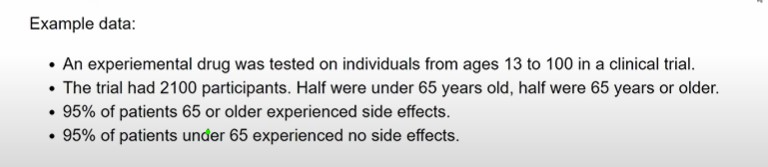

In [ ]:
for i in range(50):
  #5 percent of young individuals experiencing side effects
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)
  #5 percent of young individuals experiencing no side effects
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

In [ ]:
for i in range(1000):
  #95% of young indiviudals who didnt experience side effects
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  #95% of older indiviudals who had side effects
  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [ ]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

reshaping as it doesnt accept 1-D data


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy



In [ ]:
model=Sequential([
                  Dense(units=16,input_shape=(1,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='softmax')
])

In [ ]:
model.summary(
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6502 - accuracy: 0.5450 - val_loss: 0.6374 - val_accuracy: 0.5810 - 877ms/epoch - 5ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6265 - accuracy: 0.6238 - val_loss: 0.6122 - val_accuracy: 0.6667 - 196ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6013 - accuracy: 0.6735 - val_loss: 0.5885 - val_accuracy: 0.7000 - 195ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5771 - accuracy: 0.7164 - val_loss: 0.5646 - val_accuracy: 0.7333 - 217ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5522 - accuracy: 0.7481 - val_loss: 0.5394 - val_accuracy: 0.7524 - 186ms/epoch - 984us/step
Epoch 6/30
189/189 - 0s - loss: 0.5257 - accuracy: 0.7788 - val_loss: 0.5136 - val_accuracy: 0.7952 - 207ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4990 - accuracy: 0.8032 - val_loss: 0.4880 - val_accuracy: 0.8286 - 184ms/epoch - 974us/step
Epoch 8/30
189/189 - 0s - loss: 0.4732 - accuracy: 0.8365 - val_loss: 0.4631 - val_accuracy: 0.8524 - 184ms/epoch - 972us

In [ ]:
test_labels=[]
test_samples=[]

In [ ]:
for i in range(10):
  #5 percent of young individuals experiencing side effects
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)
  #5 percent of young individuals experiencing no side effects
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

In [ ]:
for i in range(200):
  #95% of young indiviudals who didnt experience side effects
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  #95% of older indiviudals who had side effects
  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)

In [ ]:
test_labels,test_samples=shuffle(test_labels,test_samples)

In [ ]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

Prediction


In [ ]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)


In [ ]:
for i in predictions:
  print(i)

In [ ]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [ ]:
for j in rounded_predictions:
  print(j)

In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
 from sklearn.metrics import plot_confusion_matrix

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


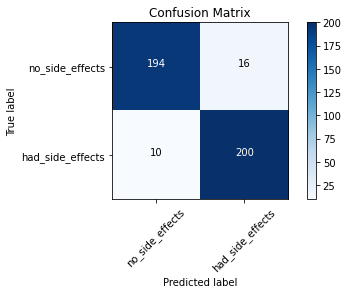

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')